In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 


In [7]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [8]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [9]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [10]:
random_seed = 2
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [21]:
# Set the non convolution model

model = Sequential()
model.add(Dense(4, input_shape = (28,28,1), activation='relu'))

model.add(Dense(32, activation ='relu'))
model.add(Dense(32, activation ='relu'))

model.add(Dropout(0.25))


model.add(Dense(64, activation ='relu'))
model.add(Dense(64, activation ='relu'))

model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [22]:
# Compile the model
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [28]:
history = model.fit(X_train, Y_train, batch_size=256, epochs=20,validation_data = (X_val, Y_val))

Epoch 1/20
148/148 [==============================] - 48s 327ms/step - loss: 0.0872 - accuracy: 0.9714 - val_loss: 0.0895 - val_accuracy: 0.9740
Epoch 2/20
148/148 [==============================] - 49s 332ms/step - loss: 0.0737 - accuracy: 0.9772 - val_loss: 0.0882 - val_accuracy: 0.9736
Epoch 3/20
148/148 [==============================] - 50s 335ms/step - loss: 0.0684 - accuracy: 0.9787 - val_loss: 0.0844 - val_accuracy: 0.9748
Epoch 4/20
148/148 [==============================] - 49s 333ms/step - loss: 0.0680 - accuracy: 0.9787 - val_loss: 0.0835 - val_accuracy: 0.9752
Epoch 5/20
148/148 [==============================] - 49s 334ms/step - loss: 0.0643 - accuracy: 0.9802 - val_loss: 0.0804 - val_accuracy: 0.9757
Epoch 6/20
148/148 [==============================] - 50s 338ms/step - loss: 0.0581 - accuracy: 0.9810 - val_loss: 0.0838 - val_accuracy: 0.9762
Epoch 7/20
148/148 [==============================] - 48s 325ms/step - loss: 0.0571 - accuracy: 0.9816 - val_loss: 0.0818 - val_ac

In [29]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model2 = Sequential()

model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))


model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dense(256, activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation = "softmax"))

In [30]:
# Compile the model
model2.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [31]:
history0 = model2.fit(X_train, Y_train, batch_size=256, epochs=20,validation_data = (X_val, Y_val))

Epoch 1/20
148/148 [==============================] - 60s 405ms/step - loss: 0.3711 - accuracy: 0.8784 - val_loss: 0.0702 - val_accuracy: 0.9798
Epoch 2/20
148/148 [==============================] - 59s 401ms/step - loss: 0.0927 - accuracy: 0.9719 - val_loss: 0.0508 - val_accuracy: 0.9833
Epoch 3/20
148/148 [==============================] - 60s 406ms/step - loss: 0.0660 - accuracy: 0.9801 - val_loss: 0.0444 - val_accuracy: 0.9864
Epoch 4/20
148/148 [==============================] - 60s 406ms/step - loss: 0.0535 - accuracy: 0.9833 - val_loss: 0.0364 - val_accuracy: 0.9895
Epoch 5/20
148/148 [==============================] - 60s 407ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0290 - val_accuracy: 0.9905
Epoch 6/20
148/148 [==============================] - 60s 405ms/step - loss: 0.0401 - accuracy: 0.9874 - val_loss: 0.0338 - val_accuracy: 0.9898
Epoch 7/20
148/148 [==============================] - 60s 406ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0373 - val_ac

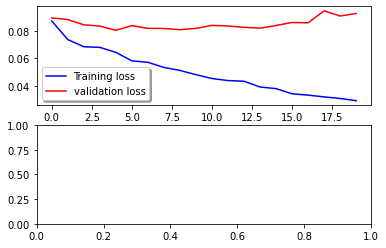

In [41]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
